In [1]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2023-11-26 11:38:27--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-11-26 11:38:27 (609 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [2]:
x = []
y = []

for line in open("iris.data", "r"):
  line = line.strip()#문자열 공백 지우기
  if line != '':
    tokens = line.split(',')# , 를 기준으로 분리
    x.append([float(t) for t in tokens[:4]])# 데이터를 넣기
    y.append(tokens[4])

y_labels = list(set(y))

y = [y_labels.index(i) for i in y]
import numpy as np
x = np.array(x)
y = np.array(y)

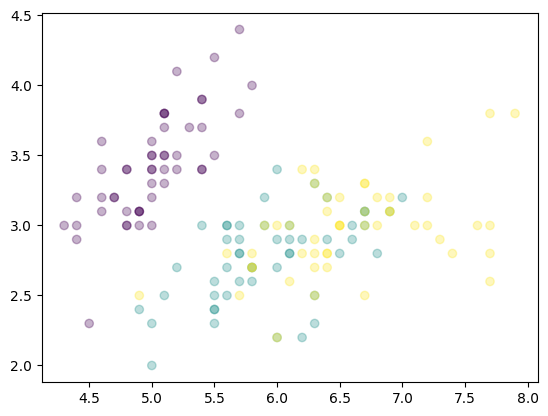

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, alpha=0.3)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
#데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)#test_size = 테스트 케이스의 비율

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#knn
knn = KNeighborsClassifier(n_neighbors=5)# n_neighbors = k
knn.fit(x_train,y_train)

y_train_pred = knn.predict(x_train)#train 데이터 결과값
y_test_pred = knn.predict(x_test)#test 결과값
#실제값과의 유사도
print("train accuracy:", accuracy_score(y_train_pred, y_train))
print("test accuracy:", accuracy_score(y_test_pred, y_test))

train accuracy: 0.9833333333333333
test accuracy: 0.9666666666666667


In [6]:
#최적의 k 찾기
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

scores = []
test_scores = []
k_values = range(1,31)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, x_train, y_train, cv=10, scoring="accuracy")#cv = n-fold의 n
  scores.append(score.mean())
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  test_scores.append(accuracy_score(y_test, y_pred))


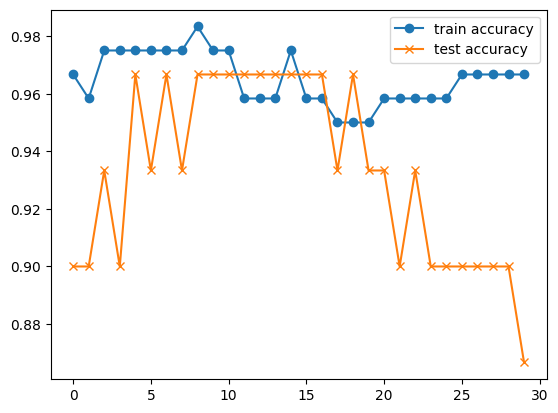

In [7]:
plt.plot(scores, "-o" , label="train accuracy")
plt.plot(test_scores,"-x", label="test accuracy")
plt.legend()
plt.show()

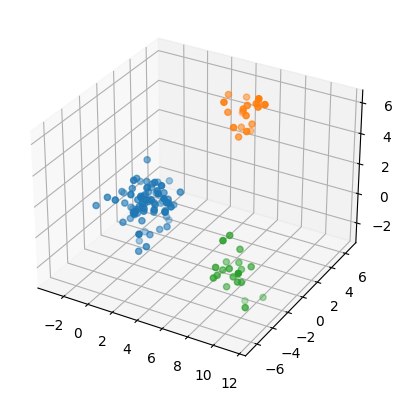

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
# 데이터 생성
dim = 3
points1 = np.random.randn(80, dim) #3차원 랜덤 포인트 80개
points2 = np.random.randn(20, dim) + np.array([5, 5, 5]) #중심점을 5,5,5 만큼 옮긴 새로운 클러스터
points3 = np.random.randn(20, dim) + np.array([10, -5,  0]) #중심점을 10,-5,0 만큼 옮긴 새로운 클러스터
points = np.concatenate( (points1, points2, points3) )#points 123을 다합친 어레이
#시각화
fig = plt.figure()
ax = fig.add_subplot(projection='3d')#3차원 만들기

#ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(points1[:,0],points1[:,1],points1[:,2])
ax.scatter(points2[:,0],points2[:,1],points2[:,2])
ax.scatter(points3[:,0],points3[:,1],points3[:,2])

plt.show()


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
[[10.59541417 -3.33174376 -2.28428057]
 [ 9.85172161 -4.98260112  0.2800657 ]
 [ 0.89649225  0.85907927  0.84334214]]


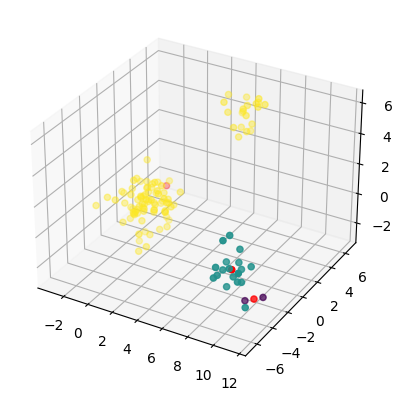

In [9]:
def kmeans(k, points):

  prev_assignments = []


# 1. 임의로 k개의 점을 중심점으로 선택 (forgy),랜덤 centroids 추출
  centroids = points[np.random.choice(len(points),size = k,replace = False)]

  for epoch in range(10):

    #각 points가 어느 centroid랑 가장 가까운지게산 = 어느 클러스터에 속하는지
    assignments = []

    for p in points:
      min_dist = 9e9
      min_cid = -1
      for cid, c in enumerate(centroids):
        dist = ((c-p)**2).sum()#centroid와의 거리
        if dist<min_dist:
          min_dist = dist
          min_cid = cid
      assignments.append(min_cid)
    # assignments 기준으로 새로운 centroid 계산
    centroids = np.array([points[np.array(assignments)==cid].mean(axis =0) for cid, c in enumerate(centroids)])
    #변경되었는지 확인
    if prev_assignments == assignments:
      break

    prev_assignments = assignments
  return assignments, centroids



assignments, centroids = kmeans(3,points)
print(assignments)
print(centroids)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:,0],points[:,1],points[:,2], c = assignments)
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2], c = "red")


plt.show()

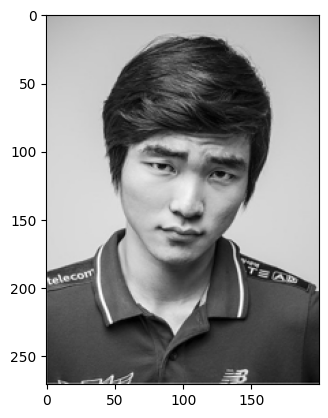

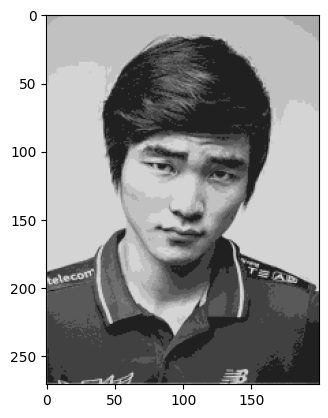

In [10]:
from PIL import Image

im = Image.open("img.jpg")#이미지 열기
width = 200
height = im.height*200//im.width
im = im.resize((width,height))#비율을 유지하고 이미지 사이즈 조절
plt.imshow(im)
plt.show()
pixels = np.array(im).reshape((-1,3))#이미지 픽셀화
k=10
assignments, centroids = kmeans(k,pixels)#kmeans 실행

for a, i in zip(assignments, range(pixels.shape[0])):#kmeans결과를 이미지로 변환
 pixels[i] = centroids[a]
# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3))
plt.imshow(im_remastered)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


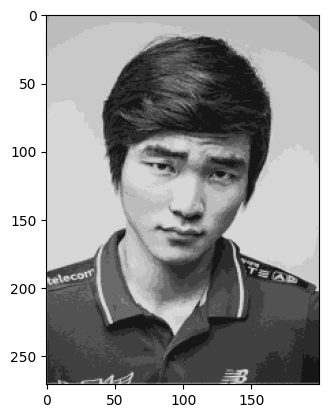

In [11]:
#sklearn
from sklearn.cluster import KMeans
pixels = np.array(im).reshape((-1,3))#이미지 픽셀화

kmeans = KMeans(n_clusters =10)#k=10
kmeans.fit(pixels)#학습

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):#kmeans결과를 이미지로 변환
 pixels[i] = kmeans.cluster_centers_[a]
# 바뀐 그림 출력

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3))
plt.imshow(im_remastered)
plt.show()

